[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/drive/1ooACuQR1szbxKso244j2UO-zDUungSMZ#scrollTo=I09zBXcloOr0)

# Problem 3

Use this notebook to write your code for problem 3.

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from numpy import genfromtxt
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
%matplotlib inline

## Load data

In [2]:
import requests

url_dict = {
    'problem3data.txt': 'https://drive.google.com/uc?export=download&id=1DPF-C43F2JuWxtHvkTP99w5r9QNHxd70',
}

def download_file(file_path):
    url = url_dict[file_path]
    print('Start downloading...')
    with requests.get(url, stream=True) as r:
        r.raise_for_status()
        with open(file_path, 'wb') as f:
            for chunk in r.iter_content(chunk_size=1024 * 1024 * 1024):
                f.write(chunk)
    print('Complete')

In [3]:
train_file = 'problem3data.txt'
download_file(train_file)
train_data = genfromtxt(train_file, delimiter='\t')

y_train = train_data[:, 9]
X_train = train_data[:, :9]

Start downloading...
Complete


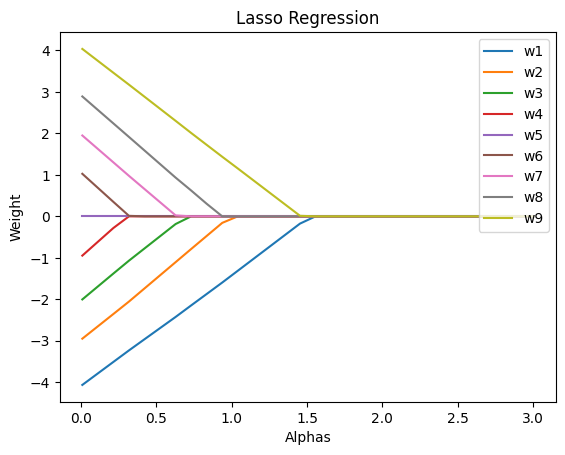

In [15]:
#lasso
alphas = np.linspace(0.01, 3, 30)
W = []

for a in alphas:
  lasso = Lasso(alpha=a)
  lasso.fit(X_train, y_train)
  W.append(lasso.coef_)

plt.figure()

i = 1
for w in np.transpose(W):
  plt.plot(alphas, w, label='w{}'.format(i))
  i += 1

plt.legend(loc = 'upper right')
plt.xlabel('Alphas')
plt.ylabel('Weight')
plt.title('Lasso Regression')
plt.show()

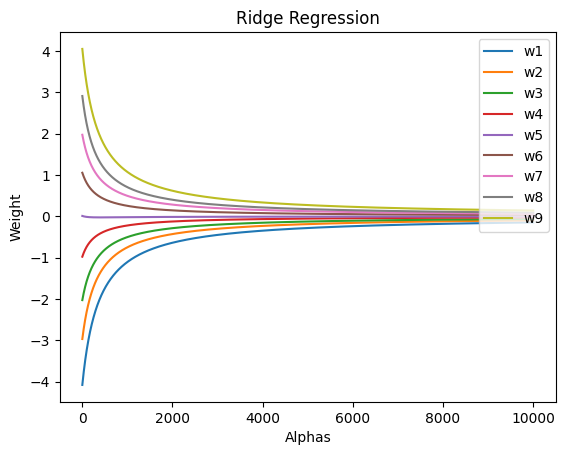

In [21]:
#ridge
alphas = np.arange(1, 10001, 1)

W = []

for a in alphas:
  ridge = Ridge(alpha=a)
  ridge.fit(X_train, y_train)
  W.append(ridge.coef_)

plt.figure()

i = 1
for w in np.transpose(W):
  plt.plot(alphas, w, label='w{}'.format(i))
  i += 1

plt.legend(loc = 'upper right')
plt.xlabel('Alphas')
plt.ylabel('Weight')
plt.title('Ridge Regression')
plt.show()